In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import pprint
from IPython.display import display
from sympy import Symbol
def euclideanDistance(x,y):
    if len(x) != len(y): return
    exp = []
    sm = 0
    for i in range(len(x)):
        v = x[i] - y[i]
        sm += v**2
        vexp = '({} - {})^'.format(x[i],y[i]) + '{2}'
        exp.append(vexp)
    rval = round(sm**.5,3)
    return Symbol('\sqrt{' + ' + '.join(exp) + '}'+' = {0}'.format(rval)),rval

def manhatan(x,y):
    if len(x) != len(y): return
    exp = []
    sm = 0
    for i in range(len(x)):
        v = abs(x[i] - y[i])
        sm += v
        vexp = '|{} - {}|'.format(x[i],y[i])
        exp.append(vexp)
    rval = sm
    return Symbol( ' + '.join(exp) +' = {0}'.format(rval)),rval

def centroid_avg(l):
    cdf = pd.DataFrame(data=l,columns = ['x','y'])
    x_avg_exp = ' + '.join([str(e) for e in cdf.x.values])
    y_avg_exp = ' + '.join([str(e) for e in cdf.y.values])
    ll = len(l)
    x_avg = round(np.mean(cdf.x.values),3)
    y_avg = round(np.mean(cdf.y.values),3)
    return '({})/{} = {}'.format(x_avg_exp,ll,x_avg),'({})/{} = {}'.format(y_avg_exp,ll,y_avg),[x_avg,y_avg]

In [2]:
def cprint(v,todisplay=True):
    if(todisplay): pprint.pprint(v)

In [8]:
def KMeans(points,k,n_iters = 5,todisplay=True,distance='euclidean'):
    n_pts = len(points)
    initial_clusters = [points[i] for i in np.random.choice(n_pts , k)]
    cprint('initial clusters are: ' + str(initial_clusters),todisplay)
    clusters = {i: {'center':initial_clusters[i],'members':[]} for i in range(k)}
    for t in range(n_iters):
        
        df = pd.DataFrame(data = np.array([[None]*n_pts]*k), columns=range(n_pts))
        cprint(df,todisplay)

        for i in range(k):
            for j in range(n_pts):
                if(distance == 'euclidean'):
                    exp , sqre = euclideanDistance(clusters[i]['center'], points[j])
                else:
                    exp , sqre = manhatan(clusters[i]['center'], points[j])
                cprint('distance between centroid {} and point {} {} is, '.format(i,j,points[j]),todisplay)
                if(todisplay): display(exp)
                df[j][i] = sqre
                cprint('-'*10,todisplay)
        cprint(df,todisplay)
        df = df.astype('float64')

        ## finding which point is close to which cluster centroid and assigning it to that cluster
        for i in range(k):
            clusters[i]['members'] = []
        cprint(clusters,todisplay)    
        for i in range(n_pts):
            clusters[df[i].idxmin()]['members'].append(points[i])
        cprint(clusters,todisplay)

        ## updating centroids
        for i in range(k):
            x_exp, y_exp , avg = centroid_avg(clusters[i]['members'])
            cprint('mean of member points of cluster {} is '.format(i) + str(x_exp) + ','+ y_exp,todisplay)
            clusters[i]['center'] = avg
        cprint(clusters,todisplay)
        cprint('-'*10 + 'Iteration {} is done'.format(t+1)  + '-'*10,todisplay)

    return df,clusters

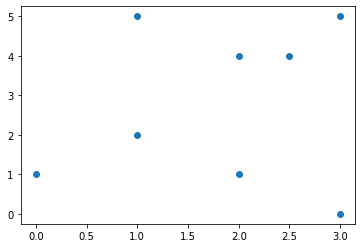

In [3]:
start = 0
k = 2 # number of clusters
points = '0,1 3,0 2,4 2,1 3,5 1,2 2.5,4 1,5'
points = [list(map(float,p.split(','))) for p in points.split(' ')]
x = np.array([e[0] for e in points])
y = np.array([e[1] for e in points])

plt.scatter(x, y)
plt.show() 


In [4]:
KMeans(points,2,5,True)

'initial clusters are: [[2.0, 1.0], [3.0, 0.0]]'
      0     1     2     3     4     5     6     7
0  None  None  None  None  None  None  None  None
1  None  None  None  None  None  None  None  None
'distance between centroid 0 and point 0 [0.0, 1.0] is, '


\sqrt{(2.0 - 0.0)^{2} + (1.0 - 1.0)^{2}} = 2.0

'----------'
'distance between centroid 0 and point 1 [3.0, 0.0] is, '


\sqrt{(2.0 - 3.0)^{2} + (1.0 - 0.0)^{2}} = 1.414

'----------'
'distance between centroid 0 and point 2 [2.0, 4.0] is, '


\sqrt{(2.0 - 2.0)^{2} + (1.0 - 4.0)^{2}} = 3.0

'----------'
'distance between centroid 0 and point 3 [2.0, 1.0] is, '


\sqrt{(2.0 - 2.0)^{2} + (1.0 - 1.0)^{2}} = 0.0

'----------'
'distance between centroid 0 and point 4 [3.0, 5.0] is, '


\sqrt{(2.0 - 3.0)^{2} + (1.0 - 5.0)^{2}} = 4.123

'----------'
'distance between centroid 0 and point 5 [1.0, 2.0] is, '


\sqrt{(2.0 - 1.0)^{2} + (1.0 - 2.0)^{2}} = 1.414

'----------'
'distance between centroid 0 and point 6 [2.5, 4.0] is, '


\sqrt{(2.0 - 2.5)^{2} + (1.0 - 4.0)^{2}} = 3.041

'----------'
'distance between centroid 0 and point 7 [1.0, 5.0] is, '


\sqrt{(2.0 - 1.0)^{2} + (1.0 - 5.0)^{2}} = 4.123

'----------'
'distance between centroid 1 and point 0 [0.0, 1.0] is, '


\sqrt{(3.0 - 0.0)^{2} + (0.0 - 1.0)^{2}} = 3.162

'----------'
'distance between centroid 1 and point 1 [3.0, 0.0] is, '


\sqrt{(3.0 - 3.0)^{2} + (0.0 - 0.0)^{2}} = 0.0

'----------'
'distance between centroid 1 and point 2 [2.0, 4.0] is, '


\sqrt{(3.0 - 2.0)^{2} + (0.0 - 4.0)^{2}} = 4.123

'----------'
'distance between centroid 1 and point 3 [2.0, 1.0] is, '


\sqrt{(3.0 - 2.0)^{2} + (0.0 - 1.0)^{2}} = 1.414

'----------'
'distance between centroid 1 and point 4 [3.0, 5.0] is, '


\sqrt{(3.0 - 3.0)^{2} + (0.0 - 5.0)^{2}} = 5.0

'----------'
'distance between centroid 1 and point 5 [1.0, 2.0] is, '


\sqrt{(3.0 - 1.0)^{2} + (0.0 - 2.0)^{2}} = 2.828

'----------'
'distance between centroid 1 and point 6 [2.5, 4.0] is, '


\sqrt{(3.0 - 2.5)^{2} + (0.0 - 4.0)^{2}} = 4.031

'----------'
'distance between centroid 1 and point 7 [1.0, 5.0] is, '


\sqrt{(3.0 - 1.0)^{2} + (0.0 - 5.0)^{2}} = 5.385

'----------'
       0      1      2      3      4      5      6      7
0    2.0  1.414    3.0    0.0  4.123  1.414  3.041  4.123
1  3.162    0.0  4.123  1.414    5.0  2.828  4.031  5.385
{0: {'center': [2.0, 1.0], 'members': []},
 1: {'center': [3.0, 0.0], 'members': []}}
{0: {'center': [2.0, 1.0],
     'members': [[0.0, 1.0],
                 [2.0, 4.0],
                 [2.0, 1.0],
                 [3.0, 5.0],
                 [1.0, 2.0],
                 [2.5, 4.0],
                 [1.0, 5.0]]},
 1: {'center': [3.0, 0.0], 'members': [[3.0, 0.0]]}}
('mean of member points of cluster 0 is (0.0 + 2.0 + 2.0 + 3.0 + 1.0 + 2.5 + '
 '1.0)/7 = 1.643,(1.0 + 4.0 + 1.0 + 5.0 + 2.0 + 4.0 + 5.0)/7 = 3.143')
'mean of member points of cluster 1 is (3.0)/1 = 3.0,(0.0)/1 = 0.0'
{0: {'center': [1.643, 3.143],
     'members': [[0.0, 1.0],
                 [2.0, 4.0],
                 [2.0, 1.0],
                 [3.0, 5.0],
                 [1.0, 2.0],
                 [2.5, 4.0],
                 [1

\sqrt{(1.643 - 0.0)^{2} + (3.143 - 1.0)^{2}} = 2.7

'----------'
'distance between centroid 0 and point 1 [3.0, 0.0] is, '


\sqrt{(1.643 - 3.0)^{2} + (3.143 - 0.0)^{2}} = 3.423

'----------'
'distance between centroid 0 and point 2 [2.0, 4.0] is, '


\sqrt{(1.643 - 2.0)^{2} + (3.143 - 4.0)^{2}} = 0.928

'----------'
'distance between centroid 0 and point 3 [2.0, 1.0] is, '


\sqrt{(1.643 - 2.0)^{2} + (3.143 - 1.0)^{2}} = 2.173

'----------'
'distance between centroid 0 and point 4 [3.0, 5.0] is, '


\sqrt{(1.643 - 3.0)^{2} + (3.143 - 5.0)^{2}} = 2.3

'----------'
'distance between centroid 0 and point 5 [1.0, 2.0] is, '


\sqrt{(1.643 - 1.0)^{2} + (3.143 - 2.0)^{2}} = 1.311

'----------'
'distance between centroid 0 and point 6 [2.5, 4.0] is, '


\sqrt{(1.643 - 2.5)^{2} + (3.143 - 4.0)^{2}} = 1.212

'----------'
'distance between centroid 0 and point 7 [1.0, 5.0] is, '


\sqrt{(1.643 - 1.0)^{2} + (3.143 - 5.0)^{2}} = 1.965

'----------'
'distance between centroid 1 and point 0 [0.0, 1.0] is, '


\sqrt{(3.0 - 0.0)^{2} + (0.0 - 1.0)^{2}} = 3.162

'----------'
'distance between centroid 1 and point 1 [3.0, 0.0] is, '


\sqrt{(3.0 - 3.0)^{2} + (0.0 - 0.0)^{2}} = 0.0

'----------'
'distance between centroid 1 and point 2 [2.0, 4.0] is, '


\sqrt{(3.0 - 2.0)^{2} + (0.0 - 4.0)^{2}} = 4.123

'----------'
'distance between centroid 1 and point 3 [2.0, 1.0] is, '


\sqrt{(3.0 - 2.0)^{2} + (0.0 - 1.0)^{2}} = 1.414

'----------'
'distance between centroid 1 and point 4 [3.0, 5.0] is, '


\sqrt{(3.0 - 3.0)^{2} + (0.0 - 5.0)^{2}} = 5.0

'----------'
'distance between centroid 1 and point 5 [1.0, 2.0] is, '


\sqrt{(3.0 - 1.0)^{2} + (0.0 - 2.0)^{2}} = 2.828

'----------'
'distance between centroid 1 and point 6 [2.5, 4.0] is, '


\sqrt{(3.0 - 2.5)^{2} + (0.0 - 4.0)^{2}} = 4.031

'----------'
'distance between centroid 1 and point 7 [1.0, 5.0] is, '


\sqrt{(3.0 - 1.0)^{2} + (0.0 - 5.0)^{2}} = 5.385

'----------'
       0      1      2      3    4      5      6      7
0    2.7  3.423  0.928  2.173  2.3  1.311  1.212  1.965
1  3.162    0.0  4.123  1.414  5.0  2.828  4.031  5.385
{0: {'center': [1.643, 3.143], 'members': []},
 1: {'center': [3.0, 0.0], 'members': []}}
{0: {'center': [1.643, 3.143],
     'members': [[0.0, 1.0],
                 [2.0, 4.0],
                 [3.0, 5.0],
                 [1.0, 2.0],
                 [2.5, 4.0],
                 [1.0, 5.0]]},
 1: {'center': [3.0, 0.0], 'members': [[3.0, 0.0], [2.0, 1.0]]}}
('mean of member points of cluster 0 is (0.0 + 2.0 + 3.0 + 1.0 + 2.5 + 1.0)/6 '
 '= 1.583,(1.0 + 4.0 + 5.0 + 2.0 + 4.0 + 5.0)/6 = 3.5')
'mean of member points of cluster 1 is (3.0 + 2.0)/2 = 2.5,(0.0 + 1.0)/2 = 0.5'
{0: {'center': [1.583, 3.5],
     'members': [[0.0, 1.0],
                 [2.0, 4.0],
                 [3.0, 5.0],
                 [1.0, 2.0],
                 [2.5, 4.0],
                 [1.0, 5.0]]},
 1: {'center': [2.5, 0.5], 'members'

\sqrt{(1.583 - 0.0)^{2} + (3.5 - 1.0)^{2}} = 2.959

'----------'
'distance between centroid 0 and point 1 [3.0, 0.0] is, '


\sqrt{(1.583 - 3.0)^{2} + (3.5 - 0.0)^{2}} = 3.776

'----------'
'distance between centroid 0 and point 2 [2.0, 4.0] is, '


\sqrt{(1.583 - 2.0)^{2} + (3.5 - 4.0)^{2}} = 0.651

'----------'
'distance between centroid 0 and point 3 [2.0, 1.0] is, '


\sqrt{(1.583 - 2.0)^{2} + (3.5 - 1.0)^{2}} = 2.535

'----------'
'distance between centroid 0 and point 4 [3.0, 5.0] is, '


\sqrt{(1.583 - 3.0)^{2} + (3.5 - 5.0)^{2}} = 2.063

'----------'
'distance between centroid 0 and point 5 [1.0, 2.0] is, '


\sqrt{(1.583 - 1.0)^{2} + (3.5 - 2.0)^{2}} = 1.609

'----------'
'distance between centroid 0 and point 6 [2.5, 4.0] is, '


\sqrt{(1.583 - 2.5)^{2} + (3.5 - 4.0)^{2}} = 1.044

'----------'
'distance between centroid 0 and point 7 [1.0, 5.0] is, '


\sqrt{(1.583 - 1.0)^{2} + (3.5 - 5.0)^{2}} = 1.609

'----------'
'distance between centroid 1 and point 0 [0.0, 1.0] is, '


\sqrt{(2.5 - 0.0)^{2} + (0.5 - 1.0)^{2}} = 2.55

'----------'
'distance between centroid 1 and point 1 [3.0, 0.0] is, '


\sqrt{(2.5 - 3.0)^{2} + (0.5 - 0.0)^{2}} = 0.707

'----------'
'distance between centroid 1 and point 2 [2.0, 4.0] is, '


\sqrt{(2.5 - 2.0)^{2} + (0.5 - 4.0)^{2}} = 3.536

'----------'
'distance between centroid 1 and point 3 [2.0, 1.0] is, '


\sqrt{(2.5 - 2.0)^{2} + (0.5 - 1.0)^{2}} = 0.707

'----------'
'distance between centroid 1 and point 4 [3.0, 5.0] is, '


\sqrt{(2.5 - 3.0)^{2} + (0.5 - 5.0)^{2}} = 4.528

'----------'
'distance between centroid 1 and point 5 [1.0, 2.0] is, '


\sqrt{(2.5 - 1.0)^{2} + (0.5 - 2.0)^{2}} = 2.121

'----------'
'distance between centroid 1 and point 6 [2.5, 4.0] is, '


\sqrt{(2.5 - 2.5)^{2} + (0.5 - 4.0)^{2}} = 3.5

'----------'
'distance between centroid 1 and point 7 [1.0, 5.0] is, '


\sqrt{(2.5 - 1.0)^{2} + (0.5 - 5.0)^{2}} = 4.743

'----------'
       0      1      2      3      4      5      6      7
0  2.959  3.776  0.651  2.535  2.063  1.609  1.044  1.609
1   2.55  0.707  3.536  0.707  4.528  2.121    3.5  4.743
{0: {'center': [1.583, 3.5], 'members': []},
 1: {'center': [2.5, 0.5], 'members': []}}
{0: {'center': [1.583, 3.5],
     'members': [[2.0, 4.0], [3.0, 5.0], [1.0, 2.0], [2.5, 4.0], [1.0, 5.0]]},
 1: {'center': [2.5, 0.5], 'members': [[0.0, 1.0], [3.0, 0.0], [2.0, 1.0]]}}
('mean of member points of cluster 0 is (2.0 + 3.0 + 1.0 + 2.5 + 1.0)/5 = '
 '1.9,(4.0 + 5.0 + 2.0 + 4.0 + 5.0)/5 = 4.0')
('mean of member points of cluster 1 is (0.0 + 3.0 + 2.0)/3 = 1.667,(1.0 + 0.0 '
 '+ 1.0)/3 = 0.667')
{0: {'center': [1.9, 4.0],
     'members': [[2.0, 4.0], [3.0, 5.0], [1.0, 2.0], [2.5, 4.0], [1.0, 5.0]]},
 1: {'center': [1.667, 0.667], 'members': [[0.0, 1.0], [3.0, 0.0], [2.0, 1.0]]}}
'----------Iteration 3 is done----------'
      0     1     2     3     4     5     6     7
0  None  None  None  None  None  None

\sqrt{(1.9 - 0.0)^{2} + (4.0 - 1.0)^{2}} = 3.551

'----------'
'distance between centroid 0 and point 1 [3.0, 0.0] is, '


\sqrt{(1.9 - 3.0)^{2} + (4.0 - 0.0)^{2}} = 4.148

'----------'
'distance between centroid 0 and point 2 [2.0, 4.0] is, '


\sqrt{(1.9 - 2.0)^{2} + (4.0 - 4.0)^{2}} = 0.1

'----------'
'distance between centroid 0 and point 3 [2.0, 1.0] is, '


\sqrt{(1.9 - 2.0)^{2} + (4.0 - 1.0)^{2}} = 3.002

'----------'
'distance between centroid 0 and point 4 [3.0, 5.0] is, '


\sqrt{(1.9 - 3.0)^{2} + (4.0 - 5.0)^{2}} = 1.487

'----------'
'distance between centroid 0 and point 5 [1.0, 2.0] is, '


\sqrt{(1.9 - 1.0)^{2} + (4.0 - 2.0)^{2}} = 2.193

'----------'
'distance between centroid 0 and point 6 [2.5, 4.0] is, '


\sqrt{(1.9 - 2.5)^{2} + (4.0 - 4.0)^{2}} = 0.6

'----------'
'distance between centroid 0 and point 7 [1.0, 5.0] is, '


\sqrt{(1.9 - 1.0)^{2} + (4.0 - 5.0)^{2}} = 1.345

'----------'
'distance between centroid 1 and point 0 [0.0, 1.0] is, '


\sqrt{(1.667 - 0.0)^{2} + (0.667 - 1.0)^{2}} = 1.7

'----------'
'distance between centroid 1 and point 1 [3.0, 0.0] is, '


\sqrt{(1.667 - 3.0)^{2} + (0.667 - 0.0)^{2}} = 1.491

'----------'
'distance between centroid 1 and point 2 [2.0, 4.0] is, '


\sqrt{(1.667 - 2.0)^{2} + (0.667 - 4.0)^{2}} = 3.35

'----------'
'distance between centroid 1 and point 3 [2.0, 1.0] is, '


\sqrt{(1.667 - 2.0)^{2} + (0.667 - 1.0)^{2}} = 0.471

'----------'
'distance between centroid 1 and point 4 [3.0, 5.0] is, '


\sqrt{(1.667 - 3.0)^{2} + (0.667 - 5.0)^{2}} = 4.533

'----------'
'distance between centroid 1 and point 5 [1.0, 2.0] is, '


\sqrt{(1.667 - 1.0)^{2} + (0.667 - 2.0)^{2}} = 1.491

'----------'
'distance between centroid 1 and point 6 [2.5, 4.0] is, '


\sqrt{(1.667 - 2.5)^{2} + (0.667 - 4.0)^{2}} = 3.436

'----------'
'distance between centroid 1 and point 7 [1.0, 5.0] is, '


\sqrt{(1.667 - 1.0)^{2} + (0.667 - 5.0)^{2}} = 4.384

'----------'
       0      1     2      3      4      5      6      7
0  3.551  4.148   0.1  3.002  1.487  2.193    0.6  1.345
1    1.7  1.491  3.35  0.471  4.533  1.491  3.436  4.384
{0: {'center': [1.9, 4.0], 'members': []},
 1: {'center': [1.667, 0.667], 'members': []}}
{0: {'center': [1.9, 4.0],
     'members': [[2.0, 4.0], [3.0, 5.0], [2.5, 4.0], [1.0, 5.0]]},
 1: {'center': [1.667, 0.667],
     'members': [[0.0, 1.0], [3.0, 0.0], [2.0, 1.0], [1.0, 2.0]]}}
('mean of member points of cluster 0 is (2.0 + 3.0 + 2.5 + 1.0)/4 = 2.125,(4.0 '
 '+ 5.0 + 4.0 + 5.0)/4 = 4.5')
('mean of member points of cluster 1 is (0.0 + 3.0 + 2.0 + 1.0)/4 = 1.5,(1.0 + '
 '0.0 + 1.0 + 2.0)/4 = 1.0')
{0: {'center': [2.125, 4.5],
     'members': [[2.0, 4.0], [3.0, 5.0], [2.5, 4.0], [1.0, 5.0]]},
 1: {'center': [1.5, 1.0],
     'members': [[0.0, 1.0], [3.0, 0.0], [2.0, 1.0], [1.0, 2.0]]}}
'----------Iteration 4 is done----------'
      0     1     2     3     4     5     6     7
0  None  None  None  None  Non

\sqrt{(2.125 - 0.0)^{2} + (4.5 - 1.0)^{2}} = 4.095

'----------'
'distance between centroid 0 and point 1 [3.0, 0.0] is, '


\sqrt{(2.125 - 3.0)^{2} + (4.5 - 0.0)^{2}} = 4.584

'----------'
'distance between centroid 0 and point 2 [2.0, 4.0] is, '


\sqrt{(2.125 - 2.0)^{2} + (4.5 - 4.0)^{2}} = 0.515

'----------'
'distance between centroid 0 and point 3 [2.0, 1.0] is, '


\sqrt{(2.125 - 2.0)^{2} + (4.5 - 1.0)^{2}} = 3.502

'----------'
'distance between centroid 0 and point 4 [3.0, 5.0] is, '


\sqrt{(2.125 - 3.0)^{2} + (4.5 - 5.0)^{2}} = 1.008

'----------'
'distance between centroid 0 and point 5 [1.0, 2.0] is, '


\sqrt{(2.125 - 1.0)^{2} + (4.5 - 2.0)^{2}} = 2.741

'----------'
'distance between centroid 0 and point 6 [2.5, 4.0] is, '


\sqrt{(2.125 - 2.5)^{2} + (4.5 - 4.0)^{2}} = 0.625

'----------'
'distance between centroid 0 and point 7 [1.0, 5.0] is, '


\sqrt{(2.125 - 1.0)^{2} + (4.5 - 5.0)^{2}} = 1.231

'----------'
'distance between centroid 1 and point 0 [0.0, 1.0] is, '


\sqrt{(1.5 - 0.0)^{2} + (1.0 - 1.0)^{2}} = 1.5

'----------'
'distance between centroid 1 and point 1 [3.0, 0.0] is, '


\sqrt{(1.5 - 3.0)^{2} + (1.0 - 0.0)^{2}} = 1.803

'----------'
'distance between centroid 1 and point 2 [2.0, 4.0] is, '


\sqrt{(1.5 - 2.0)^{2} + (1.0 - 4.0)^{2}} = 3.041

'----------'
'distance between centroid 1 and point 3 [2.0, 1.0] is, '


\sqrt{(1.5 - 2.0)^{2} + (1.0 - 1.0)^{2}} = 0.5

'----------'
'distance between centroid 1 and point 4 [3.0, 5.0] is, '


\sqrt{(1.5 - 3.0)^{2} + (1.0 - 5.0)^{2}} = 4.272

'----------'
'distance between centroid 1 and point 5 [1.0, 2.0] is, '


\sqrt{(1.5 - 1.0)^{2} + (1.0 - 2.0)^{2}} = 1.118

'----------'
'distance between centroid 1 and point 6 [2.5, 4.0] is, '


\sqrt{(1.5 - 2.5)^{2} + (1.0 - 4.0)^{2}} = 3.162

'----------'
'distance between centroid 1 and point 7 [1.0, 5.0] is, '


\sqrt{(1.5 - 1.0)^{2} + (1.0 - 5.0)^{2}} = 4.031

'----------'
       0      1      2      3      4      5      6      7
0  4.095  4.584  0.515  3.502  1.008  2.741  0.625  1.231
1    1.5  1.803  3.041    0.5  4.272  1.118  3.162  4.031
{0: {'center': [2.125, 4.5], 'members': []},
 1: {'center': [1.5, 1.0], 'members': []}}
{0: {'center': [2.125, 4.5],
     'members': [[2.0, 4.0], [3.0, 5.0], [2.5, 4.0], [1.0, 5.0]]},
 1: {'center': [1.5, 1.0],
     'members': [[0.0, 1.0], [3.0, 0.0], [2.0, 1.0], [1.0, 2.0]]}}
('mean of member points of cluster 0 is (2.0 + 3.0 + 2.5 + 1.0)/4 = 2.125,(4.0 '
 '+ 5.0 + 4.0 + 5.0)/4 = 4.5')
('mean of member points of cluster 1 is (0.0 + 3.0 + 2.0 + 1.0)/4 = 1.5,(1.0 + '
 '0.0 + 1.0 + 2.0)/4 = 1.0')
{0: {'center': [2.125, 4.5],
     'members': [[2.0, 4.0], [3.0, 5.0], [2.5, 4.0], [1.0, 5.0]]},
 1: {'center': [1.5, 1.0],
     'members': [[0.0, 1.0], [3.0, 0.0], [2.0, 1.0], [1.0, 2.0]]}}
'----------Iteration 5 is done----------'


(       0      1      2      3      4      5      6      7
 0  4.095  4.584  0.515  3.502  1.008  2.741  0.625  1.231
 1  1.500  1.803  3.041  0.500  4.272  1.118  3.162  4.031,
 {0: {'center': [2.125, 4.5],
   'members': [[2.0, 4.0], [3.0, 5.0], [2.5, 4.0], [1.0, 5.0]]},
  1: {'center': [1.5, 1.0],
   'members': [[0.0, 1.0], [3.0, 0.0], [2.0, 1.0], [1.0, 2.0]]}})

In [7]:
KMeans(points,2,5,True,distance='manhatan')

'initial clusters are: [[2.0, 4.0], [2.0, 1.0]]'
      0     1     2     3     4     5     6     7
0  None  None  None  None  None  None  None  None
1  None  None  None  None  None  None  None  None
'distance between centroid 0 and point 0 [0.0, 1.0] is, '


|2.0 - 0.0| + |4.0 - 1.0| = 5.0

'----------'
'distance between centroid 0 and point 1 [3.0, 0.0] is, '


|2.0 - 3.0| + |4.0 - 0.0| = 5.0

'----------'
'distance between centroid 0 and point 2 [2.0, 4.0] is, '


|2.0 - 2.0| + |4.0 - 4.0| = 0.0

'----------'
'distance between centroid 0 and point 3 [2.0, 1.0] is, '


|2.0 - 2.0| + |4.0 - 1.0| = 3.0

'----------'
'distance between centroid 0 and point 4 [3.0, 5.0] is, '


|2.0 - 3.0| + |4.0 - 5.0| = 2.0

'----------'
'distance between centroid 0 and point 5 [1.0, 2.0] is, '


|2.0 - 1.0| + |4.0 - 2.0| = 3.0

'----------'
'distance between centroid 0 and point 6 [2.5, 4.0] is, '


|2.0 - 2.5| + |4.0 - 4.0| = 0.5

'----------'
'distance between centroid 0 and point 7 [1.0, 5.0] is, '


|2.0 - 1.0| + |4.0 - 5.0| = 2.0

'----------'
'distance between centroid 1 and point 0 [0.0, 1.0] is, '


|2.0 - 0.0| + |1.0 - 1.0| = 2.0

'----------'
'distance between centroid 1 and point 1 [3.0, 0.0] is, '


|2.0 - 3.0| + |1.0 - 0.0| = 2.0

'----------'
'distance between centroid 1 and point 2 [2.0, 4.0] is, '


|2.0 - 2.0| + |1.0 - 4.0| = 3.0

'----------'
'distance between centroid 1 and point 3 [2.0, 1.0] is, '


|2.0 - 2.0| + |1.0 - 1.0| = 0.0

'----------'
'distance between centroid 1 and point 4 [3.0, 5.0] is, '


|2.0 - 3.0| + |1.0 - 5.0| = 5.0

'----------'
'distance between centroid 1 and point 5 [1.0, 2.0] is, '


|2.0 - 1.0| + |1.0 - 2.0| = 2.0

'----------'
'distance between centroid 1 and point 6 [2.5, 4.0] is, '


|2.0 - 2.5| + |1.0 - 4.0| = 3.5

'----------'
'distance between centroid 1 and point 7 [1.0, 5.0] is, '


|2.0 - 1.0| + |1.0 - 5.0| = 5.0

'----------'
     0    1    2    3    4    5    6    7
0  5.0  5.0  0.0  3.0  2.0  3.0  0.5  2.0
1  2.0  2.0  3.0  0.0  5.0  2.0  3.5  5.0
{0: {'center': [2.0, 4.0], 'members': []},
 1: {'center': [2.0, 1.0], 'members': []}}
{0: {'center': [2.0, 4.0],
     'members': [[2.0, 4.0], [3.0, 5.0], [2.5, 4.0], [1.0, 5.0]]},
 1: {'center': [2.0, 1.0],
     'members': [[0.0, 1.0], [3.0, 0.0], [2.0, 1.0], [1.0, 2.0]]}}
('mean of member points of cluster 0 is (2.0 + 3.0 + 2.5 + 1.0)/4 = 2.125,(4.0 '
 '+ 5.0 + 4.0 + 5.0)/4 = 4.5')
('mean of member points of cluster 1 is (0.0 + 3.0 + 2.0 + 1.0)/4 = 1.5,(1.0 + '
 '0.0 + 1.0 + 2.0)/4 = 1.0')
{0: {'center': [2.125, 4.5],
     'members': [[2.0, 4.0], [3.0, 5.0], [2.5, 4.0], [1.0, 5.0]]},
 1: {'center': [1.5, 1.0],
     'members': [[0.0, 1.0], [3.0, 0.0], [2.0, 1.0], [1.0, 2.0]]}}
'----------Iteration 1 is done----------'
      0     1     2     3     4     5     6     7
0  None  None  None  None  None  None  None  None
1  None  None  None  None  None  

|2.125 - 0.0| + |4.5 - 1.0| = 5.625

'----------'
'distance between centroid 0 and point 1 [3.0, 0.0] is, '


|2.125 - 3.0| + |4.5 - 0.0| = 5.375

'----------'
'distance between centroid 0 and point 2 [2.0, 4.0] is, '


|2.125 - 2.0| + |4.5 - 4.0| = 0.625

'----------'
'distance between centroid 0 and point 3 [2.0, 1.0] is, '


|2.125 - 2.0| + |4.5 - 1.0| = 3.625

'----------'
'distance between centroid 0 and point 4 [3.0, 5.0] is, '


|2.125 - 3.0| + |4.5 - 5.0| = 1.375

'----------'
'distance between centroid 0 and point 5 [1.0, 2.0] is, '


|2.125 - 1.0| + |4.5 - 2.0| = 3.625

'----------'
'distance between centroid 0 and point 6 [2.5, 4.0] is, '


|2.125 - 2.5| + |4.5 - 4.0| = 0.875

'----------'
'distance between centroid 0 and point 7 [1.0, 5.0] is, '


|2.125 - 1.0| + |4.5 - 5.0| = 1.625

'----------'
'distance between centroid 1 and point 0 [0.0, 1.0] is, '


|1.5 - 0.0| + |1.0 - 1.0| = 1.5

'----------'
'distance between centroid 1 and point 1 [3.0, 0.0] is, '


|1.5 - 3.0| + |1.0 - 0.0| = 2.5

'----------'
'distance between centroid 1 and point 2 [2.0, 4.0] is, '


|1.5 - 2.0| + |1.0 - 4.0| = 3.5

'----------'
'distance between centroid 1 and point 3 [2.0, 1.0] is, '


|1.5 - 2.0| + |1.0 - 1.0| = 0.5

'----------'
'distance between centroid 1 and point 4 [3.0, 5.0] is, '


|1.5 - 3.0| + |1.0 - 5.0| = 5.5

'----------'
'distance between centroid 1 and point 5 [1.0, 2.0] is, '


|1.5 - 1.0| + |1.0 - 2.0| = 1.5

'----------'
'distance between centroid 1 and point 6 [2.5, 4.0] is, '


|1.5 - 2.5| + |1.0 - 4.0| = 4.0

'----------'
'distance between centroid 1 and point 7 [1.0, 5.0] is, '


|1.5 - 1.0| + |1.0 - 5.0| = 4.5

'----------'
       0      1      2      3      4      5      6      7
0  5.625  5.375  0.625  3.625  1.375  3.625  0.875  1.625
1    1.5    2.5    3.5    0.5    5.5    1.5    4.0    4.5
{0: {'center': [2.125, 4.5], 'members': []},
 1: {'center': [1.5, 1.0], 'members': []}}
{0: {'center': [2.125, 4.5],
     'members': [[2.0, 4.0], [3.0, 5.0], [2.5, 4.0], [1.0, 5.0]]},
 1: {'center': [1.5, 1.0],
     'members': [[0.0, 1.0], [3.0, 0.0], [2.0, 1.0], [1.0, 2.0]]}}
('mean of member points of cluster 0 is (2.0 + 3.0 + 2.5 + 1.0)/4 = 2.125,(4.0 '
 '+ 5.0 + 4.0 + 5.0)/4 = 4.5')
('mean of member points of cluster 1 is (0.0 + 3.0 + 2.0 + 1.0)/4 = 1.5,(1.0 + '
 '0.0 + 1.0 + 2.0)/4 = 1.0')
{0: {'center': [2.125, 4.5],
     'members': [[2.0, 4.0], [3.0, 5.0], [2.5, 4.0], [1.0, 5.0]]},
 1: {'center': [1.5, 1.0],
     'members': [[0.0, 1.0], [3.0, 0.0], [2.0, 1.0], [1.0, 2.0]]}}
'----------Iteration 2 is done----------'
      0     1     2     3     4     5     6     7
0  None  None  None  None  None

|2.125 - 0.0| + |4.5 - 1.0| = 5.625

'----------'
'distance between centroid 0 and point 1 [3.0, 0.0] is, '


|2.125 - 3.0| + |4.5 - 0.0| = 5.375

'----------'
'distance between centroid 0 and point 2 [2.0, 4.0] is, '


|2.125 - 2.0| + |4.5 - 4.0| = 0.625

'----------'
'distance between centroid 0 and point 3 [2.0, 1.0] is, '


|2.125 - 2.0| + |4.5 - 1.0| = 3.625

'----------'
'distance between centroid 0 and point 4 [3.0, 5.0] is, '


|2.125 - 3.0| + |4.5 - 5.0| = 1.375

'----------'
'distance between centroid 0 and point 5 [1.0, 2.0] is, '


|2.125 - 1.0| + |4.5 - 2.0| = 3.625

'----------'
'distance between centroid 0 and point 6 [2.5, 4.0] is, '


|2.125 - 2.5| + |4.5 - 4.0| = 0.875

'----------'
'distance between centroid 0 and point 7 [1.0, 5.0] is, '


|2.125 - 1.0| + |4.5 - 5.0| = 1.625

'----------'
'distance between centroid 1 and point 0 [0.0, 1.0] is, '


|1.5 - 0.0| + |1.0 - 1.0| = 1.5

'----------'
'distance between centroid 1 and point 1 [3.0, 0.0] is, '


|1.5 - 3.0| + |1.0 - 0.0| = 2.5

'----------'
'distance between centroid 1 and point 2 [2.0, 4.0] is, '


|1.5 - 2.0| + |1.0 - 4.0| = 3.5

'----------'
'distance between centroid 1 and point 3 [2.0, 1.0] is, '


|1.5 - 2.0| + |1.0 - 1.0| = 0.5

'----------'
'distance between centroid 1 and point 4 [3.0, 5.0] is, '


|1.5 - 3.0| + |1.0 - 5.0| = 5.5

'----------'
'distance between centroid 1 and point 5 [1.0, 2.0] is, '


|1.5 - 1.0| + |1.0 - 2.0| = 1.5

'----------'
'distance between centroid 1 and point 6 [2.5, 4.0] is, '


|1.5 - 2.5| + |1.0 - 4.0| = 4.0

'----------'
'distance between centroid 1 and point 7 [1.0, 5.0] is, '


|1.5 - 1.0| + |1.0 - 5.0| = 4.5

'----------'
       0      1      2      3      4      5      6      7
0  5.625  5.375  0.625  3.625  1.375  3.625  0.875  1.625
1    1.5    2.5    3.5    0.5    5.5    1.5    4.0    4.5
{0: {'center': [2.125, 4.5], 'members': []},
 1: {'center': [1.5, 1.0], 'members': []}}
{0: {'center': [2.125, 4.5],
     'members': [[2.0, 4.0], [3.0, 5.0], [2.5, 4.0], [1.0, 5.0]]},
 1: {'center': [1.5, 1.0],
     'members': [[0.0, 1.0], [3.0, 0.0], [2.0, 1.0], [1.0, 2.0]]}}
('mean of member points of cluster 0 is (2.0 + 3.0 + 2.5 + 1.0)/4 = 2.125,(4.0 '
 '+ 5.0 + 4.0 + 5.0)/4 = 4.5')
('mean of member points of cluster 1 is (0.0 + 3.0 + 2.0 + 1.0)/4 = 1.5,(1.0 + '
 '0.0 + 1.0 + 2.0)/4 = 1.0')
{0: {'center': [2.125, 4.5],
     'members': [[2.0, 4.0], [3.0, 5.0], [2.5, 4.0], [1.0, 5.0]]},
 1: {'center': [1.5, 1.0],
     'members': [[0.0, 1.0], [3.0, 0.0], [2.0, 1.0], [1.0, 2.0]]}}
'----------Iteration 3 is done----------'
      0     1     2     3     4     5     6     7
0  None  None  None  None  None

|2.125 - 0.0| + |4.5 - 1.0| = 5.625

'----------'
'distance between centroid 0 and point 1 [3.0, 0.0] is, '


|2.125 - 3.0| + |4.5 - 0.0| = 5.375

'----------'
'distance between centroid 0 and point 2 [2.0, 4.0] is, '


|2.125 - 2.0| + |4.5 - 4.0| = 0.625

'----------'
'distance between centroid 0 and point 3 [2.0, 1.0] is, '


|2.125 - 2.0| + |4.5 - 1.0| = 3.625

'----------'
'distance between centroid 0 and point 4 [3.0, 5.0] is, '


|2.125 - 3.0| + |4.5 - 5.0| = 1.375

'----------'
'distance between centroid 0 and point 5 [1.0, 2.0] is, '


|2.125 - 1.0| + |4.5 - 2.0| = 3.625

'----------'
'distance between centroid 0 and point 6 [2.5, 4.0] is, '


|2.125 - 2.5| + |4.5 - 4.0| = 0.875

'----------'
'distance between centroid 0 and point 7 [1.0, 5.0] is, '


|2.125 - 1.0| + |4.5 - 5.0| = 1.625

'----------'
'distance between centroid 1 and point 0 [0.0, 1.0] is, '


|1.5 - 0.0| + |1.0 - 1.0| = 1.5

'----------'
'distance between centroid 1 and point 1 [3.0, 0.0] is, '


|1.5 - 3.0| + |1.0 - 0.0| = 2.5

'----------'
'distance between centroid 1 and point 2 [2.0, 4.0] is, '


|1.5 - 2.0| + |1.0 - 4.0| = 3.5

'----------'
'distance between centroid 1 and point 3 [2.0, 1.0] is, '


|1.5 - 2.0| + |1.0 - 1.0| = 0.5

'----------'
'distance between centroid 1 and point 4 [3.0, 5.0] is, '


|1.5 - 3.0| + |1.0 - 5.0| = 5.5

'----------'
'distance between centroid 1 and point 5 [1.0, 2.0] is, '


|1.5 - 1.0| + |1.0 - 2.0| = 1.5

'----------'
'distance between centroid 1 and point 6 [2.5, 4.0] is, '


|1.5 - 2.5| + |1.0 - 4.0| = 4.0

'----------'
'distance between centroid 1 and point 7 [1.0, 5.0] is, '


|1.5 - 1.0| + |1.0 - 5.0| = 4.5

'----------'
       0      1      2      3      4      5      6      7
0  5.625  5.375  0.625  3.625  1.375  3.625  0.875  1.625
1    1.5    2.5    3.5    0.5    5.5    1.5    4.0    4.5
{0: {'center': [2.125, 4.5], 'members': []},
 1: {'center': [1.5, 1.0], 'members': []}}
{0: {'center': [2.125, 4.5],
     'members': [[2.0, 4.0], [3.0, 5.0], [2.5, 4.0], [1.0, 5.0]]},
 1: {'center': [1.5, 1.0],
     'members': [[0.0, 1.0], [3.0, 0.0], [2.0, 1.0], [1.0, 2.0]]}}
('mean of member points of cluster 0 is (2.0 + 3.0 + 2.5 + 1.0)/4 = 2.125,(4.0 '
 '+ 5.0 + 4.0 + 5.0)/4 = 4.5')
('mean of member points of cluster 1 is (0.0 + 3.0 + 2.0 + 1.0)/4 = 1.5,(1.0 + '
 '0.0 + 1.0 + 2.0)/4 = 1.0')
{0: {'center': [2.125, 4.5],
     'members': [[2.0, 4.0], [3.0, 5.0], [2.5, 4.0], [1.0, 5.0]]},
 1: {'center': [1.5, 1.0],
     'members': [[0.0, 1.0], [3.0, 0.0], [2.0, 1.0], [1.0, 2.0]]}}
'----------Iteration 4 is done----------'
      0     1     2     3     4     5     6     7
0  None  None  None  None  None

|2.125 - 0.0| + |4.5 - 1.0| = 5.625

'----------'
'distance between centroid 0 and point 1 [3.0, 0.0] is, '


|2.125 - 3.0| + |4.5 - 0.0| = 5.375

'----------'
'distance between centroid 0 and point 2 [2.0, 4.0] is, '


|2.125 - 2.0| + |4.5 - 4.0| = 0.625

'----------'
'distance between centroid 0 and point 3 [2.0, 1.0] is, '


|2.125 - 2.0| + |4.5 - 1.0| = 3.625

'----------'
'distance between centroid 0 and point 4 [3.0, 5.0] is, '


|2.125 - 3.0| + |4.5 - 5.0| = 1.375

'----------'
'distance between centroid 0 and point 5 [1.0, 2.0] is, '


|2.125 - 1.0| + |4.5 - 2.0| = 3.625

'----------'
'distance between centroid 0 and point 6 [2.5, 4.0] is, '


|2.125 - 2.5| + |4.5 - 4.0| = 0.875

'----------'
'distance between centroid 0 and point 7 [1.0, 5.0] is, '


|2.125 - 1.0| + |4.5 - 5.0| = 1.625

'----------'
'distance between centroid 1 and point 0 [0.0, 1.0] is, '


|1.5 - 0.0| + |1.0 - 1.0| = 1.5

'----------'
'distance between centroid 1 and point 1 [3.0, 0.0] is, '


|1.5 - 3.0| + |1.0 - 0.0| = 2.5

'----------'
'distance between centroid 1 and point 2 [2.0, 4.0] is, '


|1.5 - 2.0| + |1.0 - 4.0| = 3.5

'----------'
'distance between centroid 1 and point 3 [2.0, 1.0] is, '


|1.5 - 2.0| + |1.0 - 1.0| = 0.5

'----------'
'distance between centroid 1 and point 4 [3.0, 5.0] is, '


|1.5 - 3.0| + |1.0 - 5.0| = 5.5

'----------'
'distance between centroid 1 and point 5 [1.0, 2.0] is, '


|1.5 - 1.0| + |1.0 - 2.0| = 1.5

'----------'
'distance between centroid 1 and point 6 [2.5, 4.0] is, '


|1.5 - 2.5| + |1.0 - 4.0| = 4.0

'----------'
'distance between centroid 1 and point 7 [1.0, 5.0] is, '


|1.5 - 1.0| + |1.0 - 5.0| = 4.5

'----------'
       0      1      2      3      4      5      6      7
0  5.625  5.375  0.625  3.625  1.375  3.625  0.875  1.625
1    1.5    2.5    3.5    0.5    5.5    1.5    4.0    4.5
{0: {'center': [2.125, 4.5], 'members': []},
 1: {'center': [1.5, 1.0], 'members': []}}
{0: {'center': [2.125, 4.5],
     'members': [[2.0, 4.0], [3.0, 5.0], [2.5, 4.0], [1.0, 5.0]]},
 1: {'center': [1.5, 1.0],
     'members': [[0.0, 1.0], [3.0, 0.0], [2.0, 1.0], [1.0, 2.0]]}}
('mean of member points of cluster 0 is (2.0 + 3.0 + 2.5 + 1.0)/4 = 2.125,(4.0 '
 '+ 5.0 + 4.0 + 5.0)/4 = 4.5')
('mean of member points of cluster 1 is (0.0 + 3.0 + 2.0 + 1.0)/4 = 1.5,(1.0 + '
 '0.0 + 1.0 + 2.0)/4 = 1.0')
{0: {'center': [2.125, 4.5],
     'members': [[2.0, 4.0], [3.0, 5.0], [2.5, 4.0], [1.0, 5.0]]},
 1: {'center': [1.5, 1.0],
     'members': [[0.0, 1.0], [3.0, 0.0], [2.0, 1.0], [1.0, 2.0]]}}
'----------Iteration 5 is done----------'


(       0      1      2      3      4      5      6      7
 0  5.625  5.375  0.625  3.625  1.375  3.625  0.875  1.625
 1  1.500  2.500  3.500  0.500  5.500  1.500  4.000  4.500,
 {0: {'center': [2.125, 4.5],
   'members': [[2.0, 4.0], [3.0, 5.0], [2.5, 4.0], [1.0, 5.0]]},
  1: {'center': [1.5, 1.0],
   'members': [[0.0, 1.0], [3.0, 0.0], [2.0, 1.0], [1.0, 2.0]]}})

In [105]:
points = '0,1 3,0 2,4 2,1 3,5 1,2 2.5,4 1,5 2,5 0.5,5 1,4 1.4,4 2.5,1'
points = [list(map(float,p.split(','))) for p in points.split(' ')]
df, clusterPoints = KMeans(points,k=3,n_iters=5,todisplay=False)
df, clusterPoints

(      0      1      2      3      4      5      6      7      8      9   \
 0  3.880  4.691  0.596  3.515  1.416  2.590  0.965  0.840  0.596  1.277   
 1  0.707  2.915  2.915  1.581  4.301  0.707  3.202  3.536  3.808  3.500   
 2  2.522  0.834  3.370  0.601  4.362  2.007  3.333  4.585  4.362  4.772   
 
       10     11     12  
 0  0.840  0.571  3.596  
 1  2.550  2.657  2.062  
 2  3.655  3.510  0.333  ,
 {0: {'center': [1.675, 4.5],
   'members': [[2.0, 4.0],
    [3.0, 5.0],
    [2.5, 4.0],
    [1.0, 5.0],
    [2.0, 5.0],
    [0.5, 5.0],
    [1.0, 4.0],
    [1.4, 4.0]]},
  1: {'center': [0.5, 1.5], 'members': [[0.0, 1.0], [1.0, 2.0]]},
  2: {'center': [2.5, 0.667],
   'members': [[3.0, 0.0], [2.0, 1.0], [2.5, 1.0]]}})

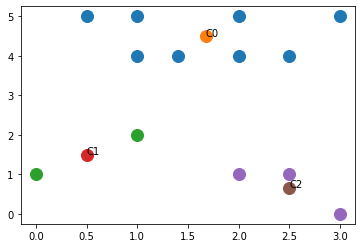

In [109]:
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for ck in clusterPoints.keys():
    clst = clusterPoints[ck]
    pts = clst['members']
    x = np.array([e[0] for e in pts])
    y = np.array([e[1] for e in pts])

    ax.plot(x, y, marker='o', linestyle='', ms=12)
    center = clst['center']
    ax.plot(center[0],center[1], marker='o', linestyle='', ms=12)
    ax.annotate('C'+str(ck),(center[0],center[1]))
    
plt.show()

In [121]:
def elbow(points):
    len_pts = len(points)
    sqr_dist_list = {}
    for k in range(len_pts,0,-1):
        df, clusterPoints = KMeans(points,k=k,n_iters=5,todisplay=False)
        sqr_dist = 0
        for ck in clusterPoints.keys():
            clst = clusterPoints[ck]

            for p in clst['members']:
                exp , dist = euclideanDistance(clst['center'],p)
                sqr_dist += dist**2
        sqr_dist_list[k] = sqr_dist
    return sqr_dist_list

In [122]:
import warnings
warnings.filterwarnings('ignore')
sqer = elbow(points)
sqer

{13: 0.9550000000000001,
 12: 2.2427520000000003,
 11: 1.954698,
 10: 2.7923439999999995,
 9: 0.9550000000000001,
 8: 4.2625589999999995,
 7: 3.5390109999999995,
 6: 5.262256999999998,
 5: 12.795441,
 4: 5.262256999999998,
 3: 10.895354000000001,
 2: 14.815123999999997,
 1: 52.513101999999996}

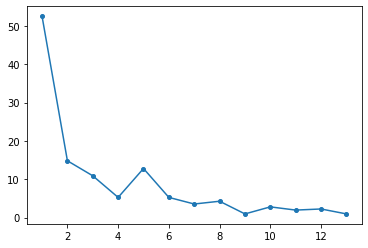

In [126]:
fig, ax = plt.subplots()
ax.plot(sqer.keys(), sqer.values(), marker='o', linestyle='-', ms=4)
plt.show()